# QUESTIONS  : 
1. How should an EDA project be structured? How deep should I go, and when should I dig deeper? My current approach involves looking at general statistics, examining missing values, duplicates, and outliers, analyzing the target variable, exploring numeric and categorical features, investigating the relationship between each feature and the target variable, and creating new features. Is this the correct approach?How to structure eda project ? my approach is : general info, missing duplicate outliers 

"What are the most common challenges you encounter when handling outliers during data cleaning? Have you observed any interesting cases where outliers were particularly impactful in a business context?"
"Do you have any advice on how to handle outliers effectively in production settings? Have you had any experiences where outliers led to significant insights or issues?"

For outlier detection, I noticed a  drop from 55,000 to 42,000 in the data. Given this 24% decrease, should this be considered an outlier, or could it be a typical fluctuation within the dataset?

peki once base modelleri deneyip iyi olan uzerinde mi hyperparameter bakmaliyim yoksa bu sekilde mi 

mmaf gbi yuksek cesitlilik varsa ne yap




Here's a refined and structured list of the steps for your EDA process:

1. Load Data
Load the dataset into a DataFrame.
2. General Info and Descriptive Statistics
Display general info about the data (e.g., shape, data types, memory usage).
Show basic descriptive statistics (mean, median, std, min, max, etc.) for numerical columns.
3. Missing Value Analysis
Check for missing values.
Decide on the strategy for handling missing data (e.g., imputation or deletion).
4. Duplicate Data Handling
Identify and handle duplicate records (if any).
Remove or mark duplicates as needed.
5. Data Type Conversion
Convert columns to appropriate data types (e.g., categorical columns, numeric-like categorical variables, date formats).
6. Outlier Detection and Treatment
Detect outliers for numerical columns using methods like IQR, Z-score, or visual methods (e.g., box plots).
Handle outliers by removal, capping, or other techniques.
7. Numerical Data Analysis
Analyze the distribution of numerical columns (e.g., histograms, boxplots).
Check correlations between numerical features and the target variable.
Perform transformations, if necessary (e.g., log transformation for skewed features).
8. Categorical Data Analysis
Analyze the frequency distribution of categorical variables (e.g., value counts, bar plots).
Visualize relationships between categorical features and the target variable.
9. Target Variable Analysis
Analyze the target variable’s distribution and check for class imbalance (if classification) or trends (if regression).
Explore how features relate to the target variable (univariate and multivariate analysis).
10. Feature Engineering
Create new features based on existing ones (e.g., date features, interactions between columns).
Check if new features add value to the dataset (e.g., feature importance, correlation).
11. Feature Selection
Select relevant features for modeling (based on correlation, importance, domain knowledge).
Remove redundant or irrelevant features.
12. Handle Categorical-Like Numerical Variables
Convert numeric-like categorical variables (e.g., 1, 2, 3, 4 values) to proper categorical types if needed.
13. Data Scaling/Normalization (if needed)
Standardize or normalize numerical features if required for certain models (e.g., in case of distance-based models like k-NN or SVM).
14. Visualizations (Optional but Recommended)
Visualize data distributions, correlations, and relationships using appropriate charts (e.g., histograms, scatter plots, pair plots, heatmaps).
Visualize missing values, outliers, and other insights from your data analysis.

# Import Libraries

In [2]:
# install libraries
# uncomment the line if running first time
!pip install pandas numpy scikit-learn boto3 sagemaker mlflow xgboost

# import libraries
import pandas as pd
import numpy as np
import boto3
import sagemaker
from sagemaker import get_execution_role
import mlflow
import mlflow.sklearn
import os
import warnings
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from io import StringIO
import io

#display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load Data

In [3]:
# AWS Session Initialization
session = sagemaker.Session()
region = session.boto_region_name
role = get_execution_role()
s3 = boto3.client('s3')

[01/27/25 22:13:03] INFO     Found credentials from IAM Role:                                   ]8;id=749388;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=405545;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[01/27/25 22:13:04] INFO     Found credentials from IAM Role:                                   ]8;id=385904;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=180447;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=828419;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=32947;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [4]:
bucket_name = 'sagemaker-bestcars-partex-data-storage'
object_key = 'data/raw/project_1_partex_valuation_data.xlsx' 

try:
    # Read the file content directly
    response = s3.get_object(Bucket=bucket_name, Key=object_key)
    file_content = response['Body'].read()
    df = pd.read_excel(io.BytesIO(file_content))
except Exception as e:
    print(f"Error reading the file: {e}")

[01/27/25 22:13:05] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=774671;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=444076;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

In [5]:
df=df.copy()

# EDA

## Data Dictionary

📄General Vehicle Information

VRM: Vehicle Registration Mark (unique registration number).

VEHICLE_ID: Unique identifier for each vehicle.

VIN_VEHICLE_ID_RANK_DESC: Rank description based on the Vehicle Identification Number (VIN). --sasi numarasi

CAP_ID: Unique ID from the CAP database for vehicle valuation.

MMAF: Combined information of Make, Model, Age, and Fuel Type.

    
🚗 Vehicle Specifications

MAKE: Vehicle manufacturer (e.g., FIAT, JEEP).

MODEL: Vehicle model (e.g., 500C, AVENGER).

VEHICLE_TRIM: Trim level

COLOUR: Vehicle color.

BODY_TYPE: Vehicle body style (e.g., SUV, Convertible).

FUEL_TYPE: Type of fuel the vehicle uses (e.g., Petrol, Diesel).

TRANSMISSION_TYPE: Type of transmission system (e.g., Manual, Automatic).

REGISTERED_KEEPERS: Number of previous owners.

ODOMETER_MILES: Mileage of the vehicle (in miles).

VEHICLE_AGE_MONTHS: Age of the vehicle in months.

REGISTRATION_DATE: Date the vehicle was registered.

VEHICLE_SOURCE: Source of the vehicle (e.g., Outsourced, Trade-In)



🛠 Refurbishment (Repair) Information

ACTUAL_REFURB_COST: Actual refurbishment/repair cost for the vehicle.

AVG_CAPID_REFURB_COST: Average refurbishment cost for vehicles with the same CAP_ID.

AVG_MMAF_REFURB_COST: Average refurbishment cost for vehicles with the same MMAF grouping.

CAP_CLEAN: Clean market value of the vehicle according to the CAP system.

ALL_REFURB_DAYS_DIFF: Total number of days taken for the refurbishment process.

CAPID_DAYS_DIFF: Days difference related to the CAP_ID refurbishment timeline.

MMAF_DAYS_DIFF: Days difference related to the MMAF refurbishment timeline.

MAX_COMPLETE_DATE: Latest completion date of the refurbishment.

CREATED_DATE: The date when the vehicle record was created.


## General Info and Descriptive Statistics

In [6]:
df.head()

,VRM,VEHICLE_ID,CREATED_DATE,VIN_VEHICLE_ID_RANK_DESC,CAP_ID,MMAF,MAKE,ACTUAL_REFURB_COST,MAX_COMPLETE_DATE,ALL_REFURB_DAYS_DIFF,CAPID_DAYS_DIFF,MMAF_DAYS_DIFF,VEHICLE_TRIM,AVG_CAPID_REFURB_COST,AVG_MMAF_REFURB_COST,CAP_CLEAN,VEHICLE_AGE__MONTHS,VEHICLE_SOURCE,TRANSMISSION_TYPE,REGISTERED_KEEPERS,ODOMETER_MILES,MODEL,COLOUR,BODY_TYPE,FUEL_TYPE,REGISTRATION_DATE
0,YY73XJV,268b15b3-9798-43ca-806c-0336d6ba4283,2024-08-07 14:36:53.390,1,104233.0,JEEPAVENGERLess than 1 Year OldPETROL,JEEP,267.390,2024-09-01,25,51.800,60.666,ALTITUDE,245.1756,246.600000,20250.0,7.366667,OUTSOURCED,MANUAL,2.0,8400.0,AVENGER,WHITE,SUV,Petrol,2023-12-30
1,YY73NJV,d095215e-7858-4001-b92d-fac15330c992,2024-09-09 22:50:17.370,1,101141.0,FIAT500C1 Years OldPETROL,FIAT,230.682,2024-09-16,7,42.866,51.125,NaN,269.4580,439.288125,12550.0,11.500000,OUTSOURCED,MANUAL,1.0,30.0,500C,GREY,Convertible,Petrol,2023-09-30
2,YY73NHT,5594ceb5-f928-4e06-83a2-aba620aa2dd1,2024-09-09 22:50:20.220,1,101141.0,FIAT500C1 Years OldPETROL,FIAT,263.142,2024-11-21,73,42.866,51.125,NaN,269.4580,439.288125,12550.0,11.500000,OUTSOURCED,MANUAL,1.0,34.0,500C,RED,Convertible,Petrol,2023-09-30
3,YY73NHN,979562e7-ca33-4752-b41b-38115f73f252,2024-09-09 22:50:17.573,1,101141.0,FIAT500C1 Years OldPETROL,FIAT,227.556,2024-09-20,11,42.866,51.125,NaN,269.4580,439.288125,12550.0,11.500000,OUTSOURCED,MANUAL,1.0,28.0,500C,BLUE,Convertible,Petrol,2023-09-30
4,YY73NFN,918c93fe-f02b-4b76-8b12-94f60344a682,2024-09-09 22:50:17.504,1,101141.0,FIAT500CLess than 1 Year OldPETROL,FIAT,222.930,2024-10-05,26,42.866,24.500,NaN,269.4580,237.775000,12550.0,11.500000,OUTSOURCED,MANUAL,1.0,34.0,500C,RED,Convertible,Petrol,2023-09-30


In [7]:
df.columns

Index(['VRM', 'VEHICLE_ID', 'CREATED_DATE', 'VIN_VEHICLE_ID_RANK_DESC', 'CAP_ID', 'MMAF', 'MAKE', 'ACTUAL_REFURB_COST', 'MAX_COMPLETE_DATE', 'ALL_REFURB_DAYS_DIFF', 'CAPID_DAYS_DIFF', 'MMAF_DAYS_DIFF', 'VEHICLE_TRIM', 'AVG_CAPID_REFURB_COST', 'AVG_MMAF_REFURB_COST', 'CAP_CLEAN', 'VEHICLE_AGE__MONTHS', 'VEHICLE_SOURCE', 'TRANSMISSION_TYPE', 'REGISTERED_KEEPERS', 'ODOMETER_MILES', 'MODEL', 'COLOUR', 'BODY_TYPE', 'FUEL_TYPE', 'REGISTRATION_DATE'], dtype='object')

In [8]:
# General information and summary statistics
print("\nGeneral Information:\n")
df.info()


General Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54884 entries, 0 to 54883
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   VRM                       54884 non-null  object        
 1   VEHICLE_ID                54884 non-null  object        
 2   CREATED_DATE              54884 non-null  datetime64[ns]
 3   VIN_VEHICLE_ID_RANK_DESC  54884 non-null  int64         
 4   CAP_ID                    54883 non-null  float64       
 5   MMAF                      54878 non-null  object        
 6   MAKE                      54884 non-null  object        
 7   ACTUAL_REFURB_COST        54884 non-null  float64       
 8   MAX_COMPLETE_DATE         54884 non-null  datetime64[ns]
 9   ALL_REFURB_DAYS_DIFF      54884 non-null  int64         
 10  CAPID_DAYS_DIFF           54884 non-null  float64       
 11  MMAF_DAYS_DIFF            54884 non-null  float64       


In [ ]:
 'VRM', 'VEHICLE_ID', 'VIN_VEHICLE_ID_RANK_DESC', 
                     'CREATED_DATE', 'MAX_COMPLETE_DATE', 'REGISTRATION_DATE'

## Rename columns

In [9]:
# renaming columns
df_cleaned = df.rename(columns={"VEHICLE_AGE__MONTHS": "VEHICLE_AGE_MONTHS"})
df_cleaned.columns

Index(['VRM', 'VEHICLE_ID', 'CREATED_DATE', 'VIN_VEHICLE_ID_RANK_DESC', 'CAP_ID', 'MMAF', 'MAKE', 'ACTUAL_REFURB_COST', 'MAX_COMPLETE_DATE', 'ALL_REFURB_DAYS_DIFF', 'CAPID_DAYS_DIFF', 'MMAF_DAYS_DIFF', 'VEHICLE_TRIM', 'AVG_CAPID_REFURB_COST', 'AVG_MMAF_REFURB_COST', 'CAP_CLEAN', 'VEHICLE_AGE_MONTHS', 'VEHICLE_SOURCE', 'TRANSMISSION_TYPE', 'REGISTERED_KEEPERS', 'ODOMETER_MILES', 'MODEL', 'COLOUR', 'BODY_TYPE', 'FUEL_TYPE', 'REGISTRATION_DATE'], dtype='object')

## Missing Value Analysis and Imputation

In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
VRM                           0
VEHICLE_ID                    0
CREATED_DATE                  0
VIN_VEHICLE_ID_RANK_DESC      0
CAP_ID                        1
MMAF                          6
MAKE                          0
ACTUAL_REFURB_COST            0
MAX_COMPLETE_DATE             0
ALL_REFURB_DAYS_DIFF          0
CAPID_DAYS_DIFF               0
MMAF_DAYS_DIFF                0
VEHICLE_TRIM                699
AVG_CAPID_REFURB_COST         0
AVG_MMAF_REFURB_COST          0
CAP_CLEAN                    31
VEHICLE_AGE__MONTHS           0
VEHICLE_SOURCE                0
TRANSMISSION_TYPE            14
REGISTERED_KEEPERS          175
ODOMETER_MILES                1
MODEL                         0
COLOUR                       12
BODY_TYPE                    14
FUEL_TYPE                    10
REGISTRATION_DATE             0
dtype: int64


In [11]:
# Calculate missing value counts and percentages
missing_counts = df_cleaned.isnull().sum()
missing_percentages = df_cleaned.isnull().mean() * 100

missing_df = pd.DataFrame({
    'Column': df_cleaned.columns,
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
}).reset_index(drop=True)

missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)
missing_df


,Column,Missing_Count,Missing_Percentage
12,VEHICLE_TRIM,699,1.273595
19,REGISTERED_KEEPERS,175,0.318854
15,CAP_CLEAN,31,0.056483
18,TRANSMISSION_TYPE,14,0.025508
23,BODY_TYPE,14,0.025508
22,COLOUR,12,0.021864
24,FUEL_TYPE,10,0.018220
5,MMAF,6,0.010932
20,ODOMETER_MILES,1,0.001822
4,CAP_ID,1,0.001822


In [12]:
def handle_missing_values(df):
    # Identify columns with missing values
    missing_columns = df.columns[df.isnull().any()]

    # Iterate over columns with missing values
    for col in missing_columns:
        missing_percentage = df[col].isnull().mean() * 100  # Calculate missing percentage
        
        if missing_percentage < 10:
            # If missing value percentage is less than 10, drop the rows
            df = df.dropna(subset=[col])
            print(f"Dropped rows for {col} (Missing < 10%)")
        else:
            # If missing value percentage is greater than or equal to 10, fill based on MMAF group
            if df[col].dtype == 'object':  # For categorical columns
                # Fill missing values using the mode within the MMAF grouping
                df[col] = df.groupby('MMAF')[col].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))
                print(f"Filled missing values for {col} (Categorical) using mode by MMAF")
            else:  # For numeric columns
                # Fill missing values using the mean within the MMAF grouping
                df[col] = df.groupby('MMAF')[col].apply(lambda x: x.fillna(x.mean()))
                print(f"Filled missing values for {col} (Numeric) using mean by MMAF")
    
    return df

In [13]:
# Apply the function to handle missing values
df_cleaned = handle_missing_values(df)

# Verify the result
print("\nMissing values after handling:")
print(df_cleaned.isnull().sum())
print(df_cleaned.shape)

Dropped rows for CAP_ID (Missing < 10%)
Dropped rows for MMAF (Missing < 10%)
Dropped rows for VEHICLE_TRIM (Missing < 10%)
Dropped rows for CAP_CLEAN (Missing < 10%)
Dropped rows for TRANSMISSION_TYPE (Missing < 10%)
Dropped rows for REGISTERED_KEEPERS (Missing < 10%)
Dropped rows for ODOMETER_MILES (Missing < 10%)
Dropped rows for COLOUR (Missing < 10%)
Dropped rows for BODY_TYPE (Missing < 10%)
Dropped rows for FUEL_TYPE (Missing < 10%)

Missing values after handling:
VRM                         0
VEHICLE_ID                  0
CREATED_DATE                0
VIN_VEHICLE_ID_RANK_DESC    0
CAP_ID                      0
MMAF                        0
MAKE                        0
ACTUAL_REFURB_COST          0
MAX_COMPLETE_DATE           0
ALL_REFURB_DAYS_DIFF        0
CAPID_DAYS_DIFF             0
MMAF_DAYS_DIFF              0
VEHICLE_TRIM                0
AVG_CAPID_REFURB_COST       0
AVG_MMAF_REFURB_COST        0
CAP_CLEAN                   0
VEHICLE_AGE__MONTHS         0
VEHICLE_SOURCE

## Duplicate Records Check

In [14]:
df_cleaned[df_cleaned.duplicated()] 

,VRM,VEHICLE_ID,CREATED_DATE,VIN_VEHICLE_ID_RANK_DESC,CAP_ID,MMAF,MAKE,ACTUAL_REFURB_COST,MAX_COMPLETE_DATE,ALL_REFURB_DAYS_DIFF,CAPID_DAYS_DIFF,MMAF_DAYS_DIFF,VEHICLE_TRIM,AVG_CAPID_REFURB_COST,AVG_MMAF_REFURB_COST,CAP_CLEAN,VEHICLE_AGE__MONTHS,VEHICLE_SOURCE,TRANSMISSION_TYPE,REGISTERED_KEEPERS,ODOMETER_MILES,MODEL,COLOUR,BODY_TYPE,FUEL_TYPE,REGISTRATION_DATE


In [15]:
# remove duplicates
df_cleaned = df_cleaned.drop_duplicates()  

 ## Data Type Conversion

In [16]:
def convert_numeric_to_categorical(df, threshold=15):
    """
    This function checks numeric columns in the dataframe and converts them to categorical
    if the number of unique values is less than the specified threshold.
    
    Parameters:
    - df: DataFrame, the dataframe to process
    - threshold: int, the threshold for unique values to decide if a column should be categorical
    
    Returns:
    - df: DataFrame with numeric columns converted to categorical based on the threshold
    """
    # Iterate over all columns in the dataframe
    for column in df.select_dtypes(include=['number']).columns:
        # Get the number of unique values in the column
        unique_values_count = df[column].nunique()
        
        # If the number of unique values is less than the threshold, convert to categorical
        if unique_values_count < threshold:
            df[column] = df[column].astype('category')
            print(f"Column '{column}' converted to categorical (less than {threshold} unique values).")
        else:
            print(f"Column '{column}' remains numeric (more than {threshold} unique values).")
    
    return df

# Example usage: Convert numeric columns with less than 15 unique values to categorical
df_cleaned = convert_numeric_to_categorical(df_cleaned, threshold=15)


Column 'VIN_VEHICLE_ID_RANK_DESC' converted to categorical (less than 15 unique values).
Column 'CAP_ID' remains numeric (more than 15 unique values).
Column 'ACTUAL_REFURB_COST' remains numeric (more than 15 unique values).
Column 'ALL_REFURB_DAYS_DIFF' remains numeric (more than 15 unique values).
Column 'CAPID_DAYS_DIFF' remains numeric (more than 15 unique values).
Column 'MMAF_DAYS_DIFF' remains numeric (more than 15 unique values).
Column 'AVG_CAPID_REFURB_COST' remains numeric (more than 15 unique values).
Column 'AVG_MMAF_REFURB_COST' remains numeric (more than 15 unique values).
Column 'CAP_CLEAN' remains numeric (more than 15 unique values).
Column 'VEHICLE_AGE__MONTHS' remains numeric (more than 15 unique values).
Column 'REGISTERED_KEEPERS' converted to categorical (less than 15 unique values).
Column 'ODOMETER_MILES' remains numeric (more than 15 unique values).


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53988 entries, 0 to 54883
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   VRM                       53988 non-null  object        
 1   VEHICLE_ID                53988 non-null  object        
 2   CREATED_DATE              53988 non-null  datetime64[ns]
 3   VIN_VEHICLE_ID_RANK_DESC  53988 non-null  category      
 4   CAP_ID                    53988 non-null  float64       
 5   MMAF                      53988 non-null  object        
 6   MAKE                      53988 non-null  object        
 7   ACTUAL_REFURB_COST        53988 non-null  float64       
 8   MAX_COMPLETE_DATE         53988 non-null  datetime64[ns]
 9   ALL_REFURB_DAYS_DIFF      53988 non-null  int64         
 10  CAPID_DAYS_DIFF           53988 non-null  float64       
 11  MMAF_DAYS_DIFF            53988 non-null  float64       
 12  VEHICLE_TRIM      

## Outlier Detection and Treatment

In [18]:
def detect_and_remove_outliers(df, columns, z_score_threshold=3, iqr_threshold=1.5, visualize=True):
    """
    Detects and removes outliers from specified columns of the DataFrame.
    
    Args:
    df (pandas.DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names to perform outlier detection on.
    z_score_threshold (float): The Z-Score threshold for detecting outliers. Default is 3.
    iqr_threshold (float): The IQR threshold for detecting outliers. Default is 1.5.
    visualize (bool): Whether to display boxplots for each column before and after removing outliers. Default is True.
    
    Returns:
    pandas.DataFrame: The cleaned DataFrame with outliers removed.
    pandas.DataFrame: Summary DataFrame showing outliers removed and methods used.
    """
    # Dictionary to track the outliers count and method for each column
    outlier_info = {}

    # Iterate over each column provided
    for column in columns:
        if column not in df.columns:
            outlier_info[column] = {"outliers_removed": 0, "method": "N/A"}
            continue
        
        # Visualize the boxplot before removing outliers
        if visualize:
            sns.boxplot(x=df[column])
            plt.title(f"Boxplot for {column} - Before Removing Outliers")
            plt.show()
        
        # Normality check using Shapiro-Wilk Test
        _, p_value = stats.shapiro(df[column].dropna())  # Null values are dropped for normality test
        
        # Initialize outliers count
        initial_outliers = df[column].isna().sum()
        
        # If p-value > 0.05, data is normally distributed, Z-Score method will be applied
        if p_value > 0.05:
            # Z-Score outlier detection (used for normal distribution)
            z_scores = np.abs(stats.zscore(df[column].dropna()))  # Calculate Z-Scores
            outliers = df[column][z_scores > z_score_threshold]  # Consider Z-Scores greater than threshold as outliers
            
            # Remove outliers
            df = df[z_scores <= z_score_threshold]
            
            # Track outlier count and method
            outlier_info[column] = {"outliers_removed": len(outliers), "method": "Z-Score"}
        
        else:
            # IQR outlier detection (used for skewed or non-normal data)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_threshold * IQR
            upper_bound = Q3 + iqr_threshold * IQR
            outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
            
            # Remove outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            
            # Track outlier count and method
            outlier_info[column] = {"outliers_removed": len(outliers), "method": "IQR"}
        
        # Visualize the boxplot after removing outliers
        if visualize:
            sns.boxplot(x=df[column])
            plt.title(f"Boxplot for {column} - After Removing Outliers")
            plt.show()

    # Summary of outliers removal - Creating a DataFrame to display the summary
    outlier_summary = pd.DataFrame.from_dict(outlier_info, orient='index')
    outlier_summary.columns = ['Outliers Removed', 'Method']

    # Print the summary of outliers removed
    print("\nOutlier Detection Summary:")
    print(outlier_summary)
    
    # Return the cleaned DataFrame (without outliers) and the summary (as a DataFrame)
    return df, outlier_summary


In [19]:
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
numerical_columns

Index(['CAP_ID', 'ACTUAL_REFURB_COST', 'ALL_REFURB_DAYS_DIFF', 'CAPID_DAYS_DIFF', 'MMAF_DAYS_DIFF', 'AVG_CAPID_REFURB_COST', 'AVG_MMAF_REFURB_COST', 'CAP_CLEAN', 'VEHICLE_AGE__MONTHS', 'ODOMETER_MILES'], dtype='object')

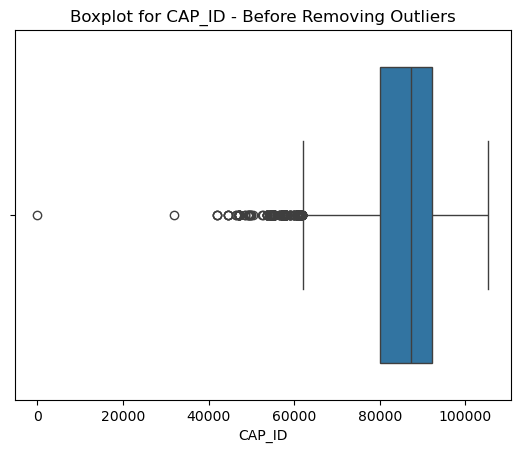

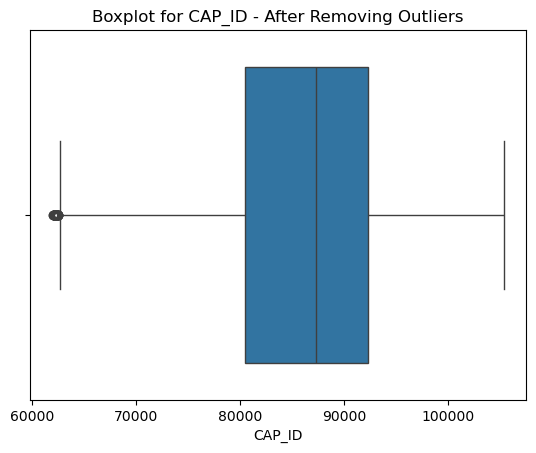

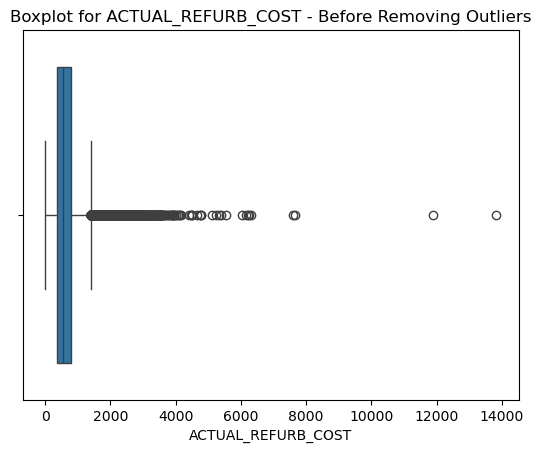

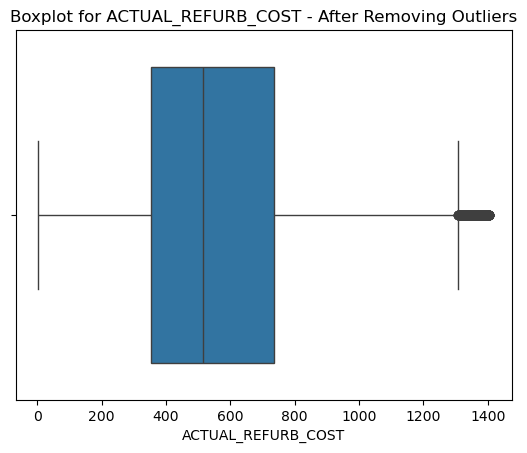

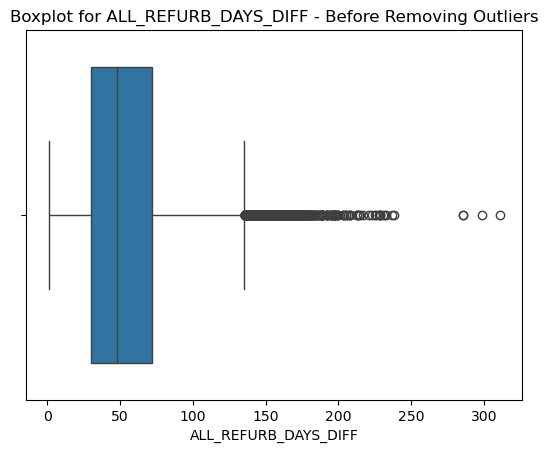

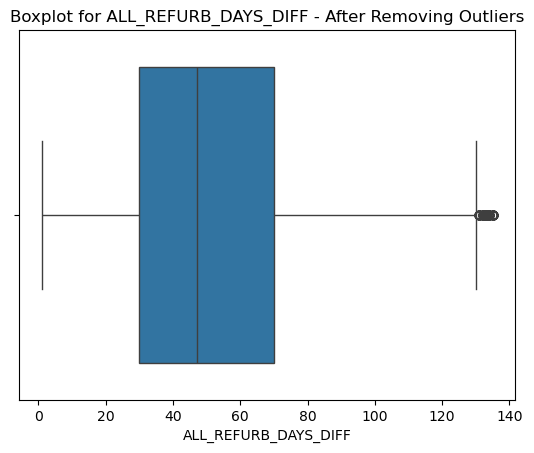

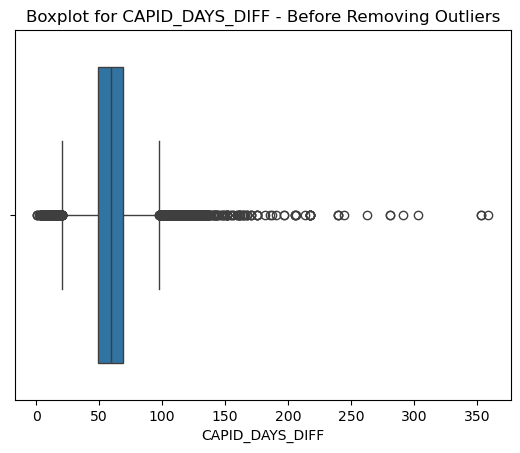

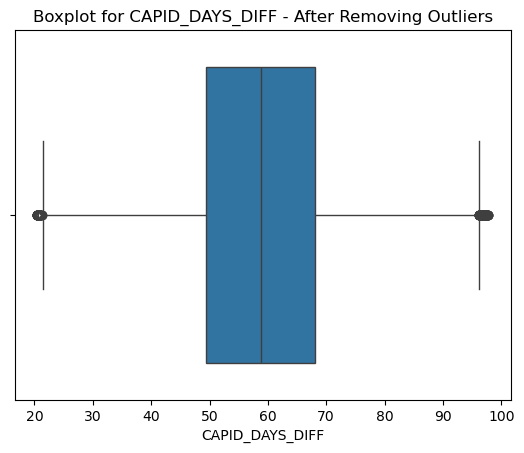

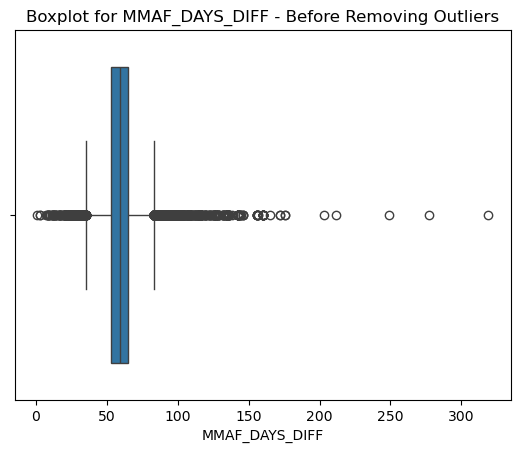

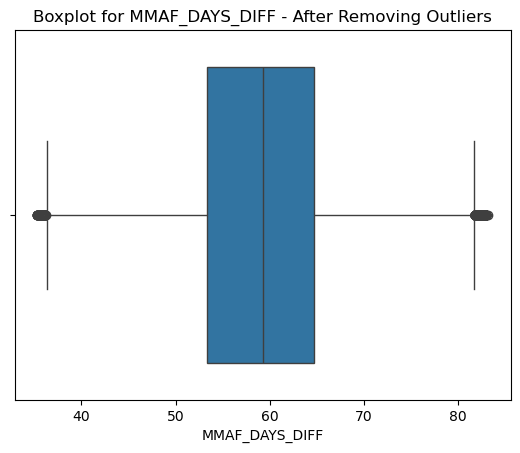

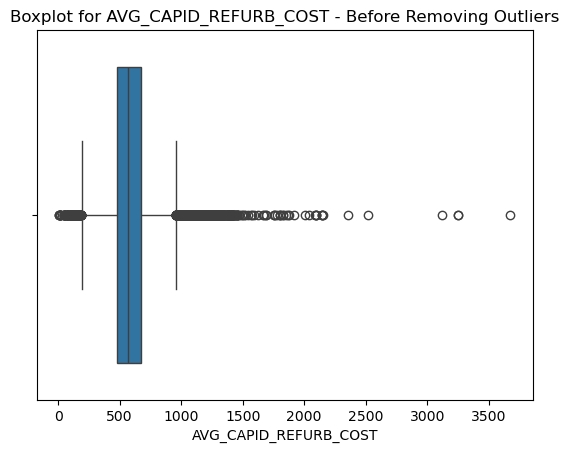

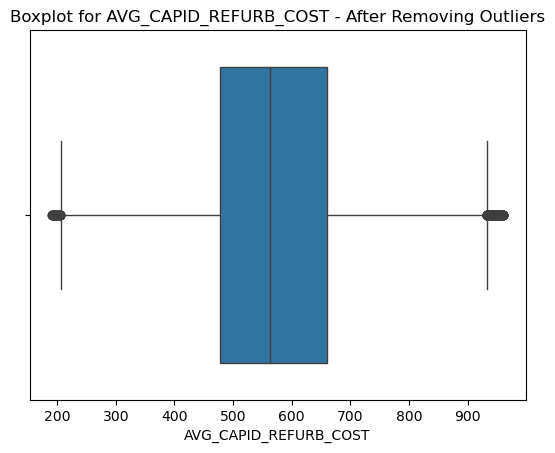

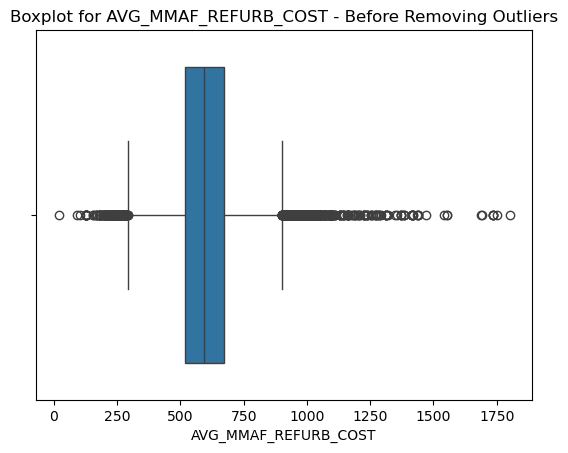

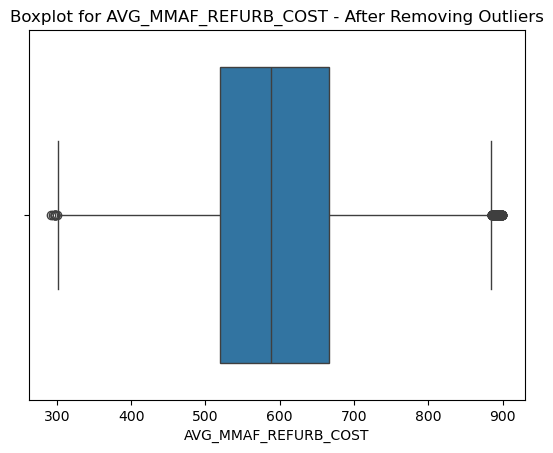

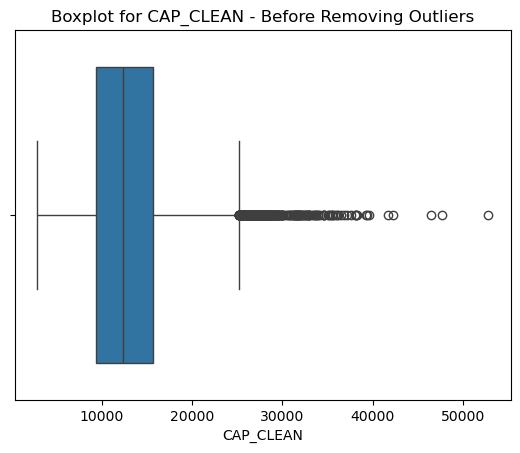

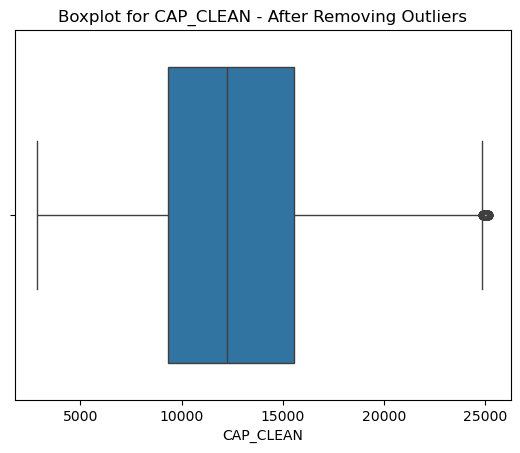

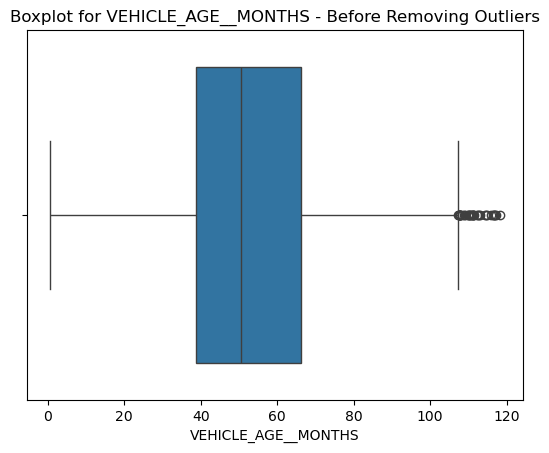

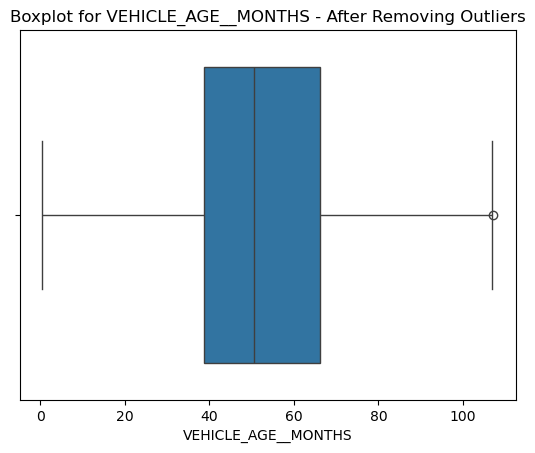

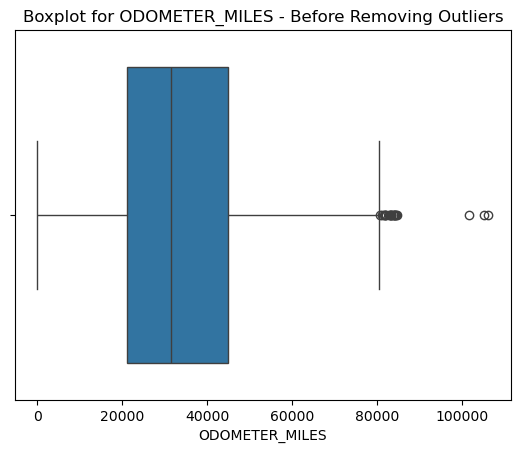

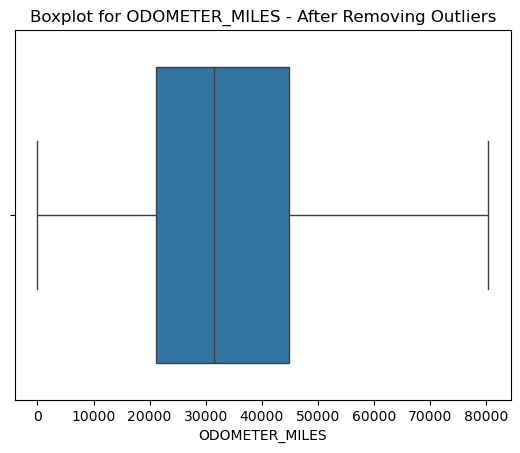


Outlier Detection Summary:
                       Outliers Removed Method
CAP_ID                              339    IQR
ACTUAL_REFURB_COST                 2385    IQR
ALL_REFURB_DAYS_DIFF                956    IQR
CAPID_DAYS_DIFF                    1584    IQR
MMAF_DAYS_DIFF                     1961    IQR
AVG_CAPID_REFURB_COST              1493    IQR
AVG_MMAF_REFURB_COST               1107    IQR
CAP_CLEAN                           492    IQR
VEHICLE_AGE__MONTHS                  37    IQR
ODOMETER_MILES                       21    IQR

Cleaned DataFrame (Without Outliers):
       VRM                            VEHICLE_ID            CREATED_DATE  VIN_VEHICLE_ID_RANK_DESC    CAP_ID                       MMAF  MAKE  ACTUAL_REFURB_COST MAX_COMPLETE_DATE  ALL_REFURB_DAYS_DIFF  CAPID_DAYS_DIFF  MMAF_DAYS_DIFF VEHICLE_TRIM  AVG_CAPID_REFURB_COST  AVG_MMAF_REFURB_COST  CAP_CLEAN  VEHICLE_AGE__MONTHS VEHICLE_SOURCE TRANSMISSION_TYPE  REGISTERED_KEEPERS  ODOMETER_MILES MODEL COLOUR    BODY_T

In [20]:
df_cleaned, outlier_summary = detect_and_remove_outliers(df, numerical_columns, visualize=True)

# Cleaned DataFrame
print("\nCleaned DataFrame (Without Outliers):")
print(df_cleaned.head())

# Outlier Removal Summary
print("\nOutlier Removal Summary:")
print(outlier_summary)

In [21]:
df.shape

(54884, 26)

In [22]:
df_cleaned.shape

(44496, 26)

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44496 entries, 1 to 54883
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   VRM                       44496 non-null  object        
 1   VEHICLE_ID                44496 non-null  object        
 2   CREATED_DATE              44496 non-null  datetime64[ns]
 3   VIN_VEHICLE_ID_RANK_DESC  44496 non-null  int64         
 4   CAP_ID                    44496 non-null  float64       
 5   MMAF                      44496 non-null  object        
 6   MAKE                      44496 non-null  object        
 7   ACTUAL_REFURB_COST        44496 non-null  float64       
 8   MAX_COMPLETE_DATE         44496 non-null  datetime64[ns]
 9   ALL_REFURB_DAYS_DIFF      44496 non-null  int64         
 10  CAPID_DAYS_DIFF           44496 non-null  float64       
 11  MMAF_DAYS_DIFF            44496 non-null  float64       
 12  VEHICLE_TRIM      

## Numerical Data Analysis

In [24]:
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['VIN_VEHICLE_ID_RANK_DESC', 'CAP_ID', 'ACTUAL_REFURB_COST', 'ALL_REFURB_DAYS_DIFF', 'CAPID_DAYS_DIFF', 'MMAF_DAYS_DIFF', 'AVG_CAPID_REFURB_COST', 'AVG_MMAF_REFURB_COST', 'CAP_CLEAN', 'VEHICLE_AGE__MONTHS', 'REGISTERED_KEEPERS', 'ODOMETER_MILES'], dtype='object')

In [25]:
df_cleaned['VIN_VEHICLE_ID_RANK_DESC'].value_counts()

1     43738
2       706
3        42
4         7
5         1
45        1
8         1
Name: VIN_VEHICLE_ID_RANK_DESC, dtype: int64

In [26]:
def numeric_data_summary(df, refurb_column='ACTUAL_REFURB_COST'):
    """
    Function to generate summary statistics and visualizations for numeric columns
    and their relationship with refurb cost.
    
    Args:
    df (pandas.DataFrame): The input DataFrame.
    refurb_column (str): The column name for refurb cost (default 'refurb_cost').
    
    Returns:
    None (Displays summary and visualizations)
    """
    
    # 1. Summary statistics for numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("\nSummary Statistics for Numeric Columns:")
    summary = df[numeric_cols].describe()
    print(summary)
    
    # 2. Refurb cost distribution visualizations (Histplot and Boxplot side by side)
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create a subplot with 1 row and 2 columns
    
    # Histplot for refurb cost distribution
    sns.histplot(df[refurb_column], kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f"{refurb_column} Distribution")
    axes[0].set_xlabel(refurb_column)
    axes[0].set_ylabel("Frequency")
    
    # Boxplot for refurb cost distribution
    sns.boxplot(x=df[refurb_column], color='skyblue', ax=axes[1])
    axes[1].set_title(f"{refurb_column} Boxplot")
    axes[1].set_xlabel(refurb_column)
    
    plt.tight_layout()
    plt.show()

    # 3. Scatter plots showing relationships with refurb cost
    # If only one scatter plot, axes will be a single plot, so convert it to a list
    scatter_columns = [col for col in numeric_cols if col != refurb_column]
    
    # Handle case where there's only one scatter plot
    if len(scatter_columns) == 1:
        fig, axes = plt.subplots(1, 1, figsize=(8, 6))
        sns.scatterplot(x=df[scatter_columns[0]], y=df[refurb_column], color='orange', ax=axes)
        axes.set_title(f"Relationship between {scatter_columns[0]} and {refurb_column}")
        axes.set_xlabel(scatter_columns[0])
        axes.set_ylabel(refurb_column)
        plt.tight_layout()
        plt.show()
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(scatter_columns), figsize=(18, 6))
        
        # If there's only one column, make sure axes is iterable (list)
        if len(scatter_columns) == 1:
            axes = [axes]
        
        for i, column in enumerate(scatter_columns):
            sns.scatterplot(x=df[column], y=df[refurb_column], color='orange', ax=axes[i])
            # axes[i].set_title(f"Relationship between {column} and {refurb_column}")
            axes[i].set_title(f"{column}")
            axes[i].set_xlabel(column)
            axes[i].set_ylabel(refurb_column)
            axes[i].title.set_rotation(45)  # Rotate the title
         
        plt.tight_layout()
        plt.show()

    # Optionally, we can also plot correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()



Summary Statistics for Numeric Columns:
       VIN_VEHICLE_ID_RANK_DESC         CAP_ID  ACTUAL_REFURB_COST  ALL_REFURB_DAYS_DIFF  CAPID_DAYS_DIFF  MMAF_DAYS_DIFF  AVG_CAPID_REFURB_COST  AVG_MMAF_REFURB_COST     CAP_CLEAN  VEHICLE_AGE__MONTHS  REGISTERED_KEEPERS  ODOMETER_MILES
count              44496.000000   44496.000000        44496.000000          44496.000000     44496.000000    44496.000000           44496.000000          44496.000000  44496.000000         44496.000000        44368.000000    44496.000000
mean                   1.019462   86058.122708          557.178258             51.348054        58.924106       59.070268             570.901581            595.238733  12694.739977            53.283627            1.688965    33802.555668
std                    0.256225    7989.466422          277.158445             28.332706        13.592826        9.103253             133.407779            111.163860   4411.018340            18.056342            0.868838    16664.690406
min    

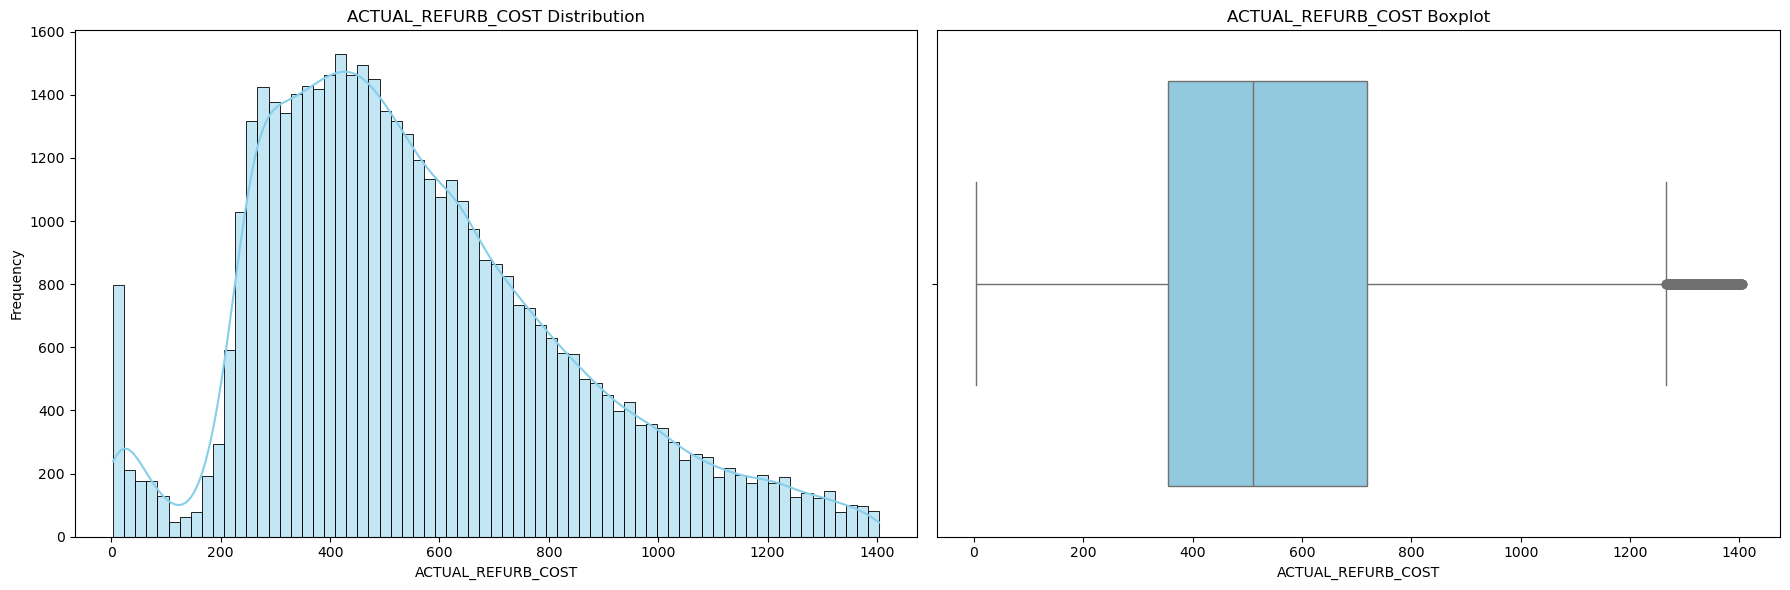

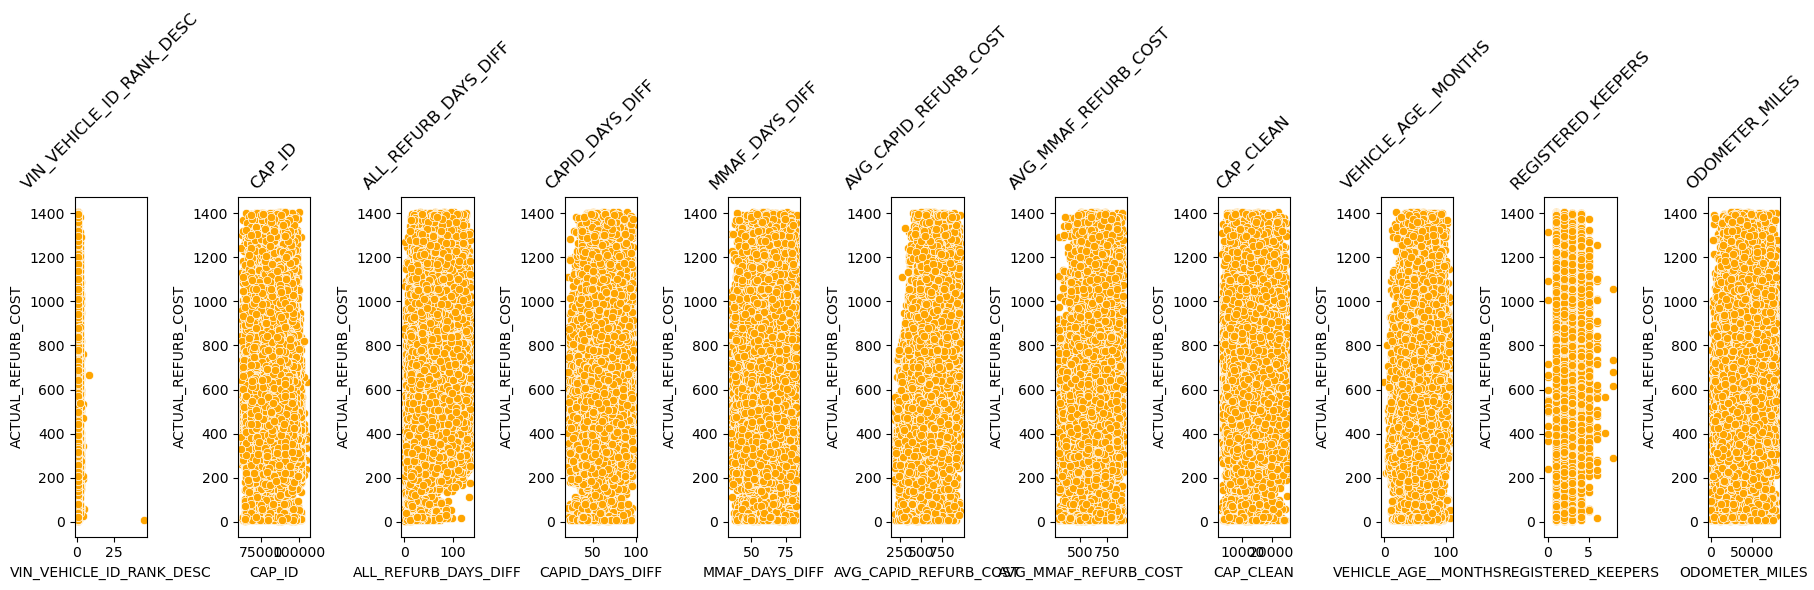

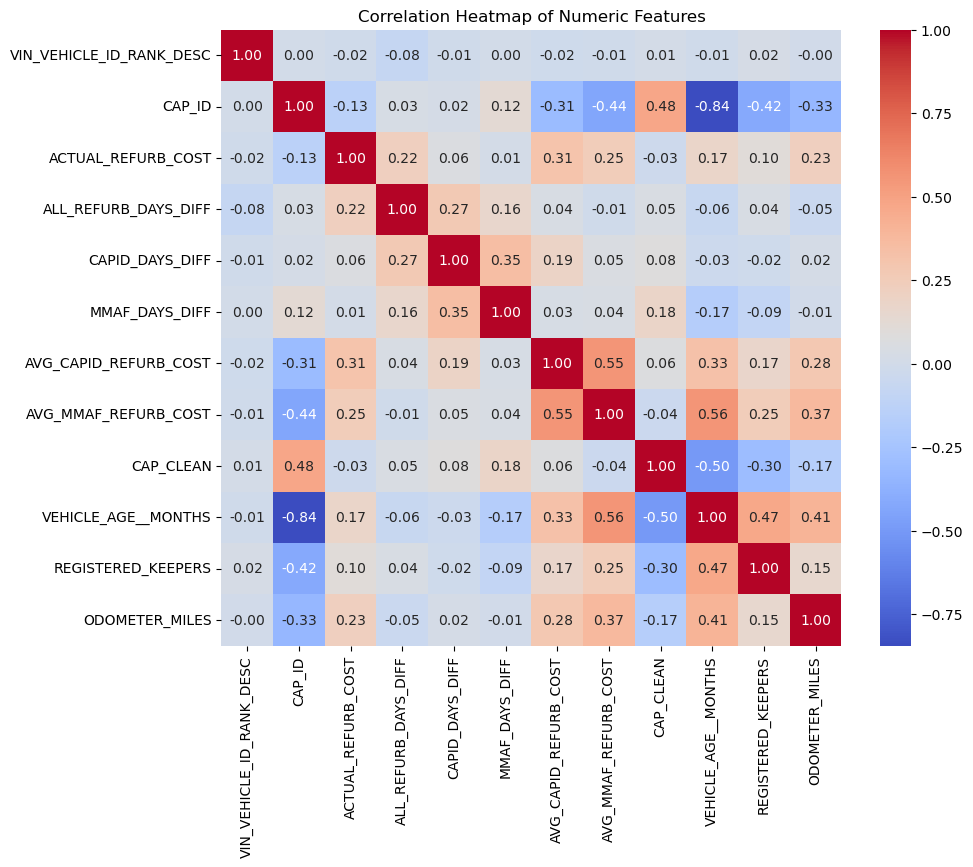

In [27]:
numeric_data_summary(df_cleaned)

## Categorical Data Analysis

In [28]:
def categorical_data_summary(df, target_column='ACTUAL_REFURB_COST'):
    """
    Function to generate summary statistics and visualizations for categorical columns,
    along with their relationship with a numerical column (e.g., refurb cost).
    
    Args:
    df (pandas.DataFrame): The input DataFrame.
    target_column (str): The numerical column to analyze against categorical columns.
    
    Returns:
    None (Displays summary and visualizations)
    """
    # 1. Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # 2. Display summary statistics for categorical columns
    print("\nSummary Statistics for Categorical Columns:")
    for column in categorical_cols:
        print(f"\n{column} - Value Counts:")
        print(df[column].value_counts())

    # 3. Visualize the distribution of each categorical column only if number of categories <= 15
    plt.figure(figsize=(12, 5 * len(categorical_cols)))
    for i, column in enumerate(categorical_cols, 1):
        unique_categories = df[column].nunique()
        
        # Only visualize columns with 15 or fewer unique categories
        if unique_categories <= 15:
            plt.subplot(len(categorical_cols), 1, i)
            sns.countplot(x=df[column], palette='Set2')
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    # 4. Plot relationship with target_column (e.g., refurb cost) if numeric
    if target_column in df.columns and pd.api.types.is_numeric_dtype(df[target_column]):
        plt.figure(figsize=(12, 5 * len(categorical_cols)))
        for i, column in enumerate(categorical_cols, 1):
            unique_categories = df[column].nunique()
            
            # Only visualize columns with 15 or fewer unique categories
            if unique_categories <= 15:
                plt.subplot(len(categorical_cols), 1, i)
                sns.boxplot(x=df[column], y=df[target_column], palette='Set2')
                plt.title(f"{target_column} vs {column}")
                plt.xlabel(column)
                plt.ylabel(target_column)
                plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n{target_column} column is missing or not numeric.")



Summary Statistics for Categorical Columns:

VRM - Value Counts:
A10MVM     1
YY73NJV    1
YY73NHT    1
YY73NHN    1
YY73NFD    1
          ..
YY71EUD    1
YY71EFV    1
YY71BWO    1
YY71BVN    1
YY70YJG    1
Name: VRM, Length: 44496, dtype: int64

VEHICLE_ID - Value Counts:
ad1c576e-fbb2-4074-b56a-fcce88e7a658    1
d095215e-7858-4001-b92d-fac15330c992    1
5594ceb5-f928-4e06-83a2-aba620aa2dd1    1
979562e7-ca33-4752-b41b-38115f73f252    1
8a7a870b-a6d6-4c73-9692-81713bba4c45    1
                                       ..
adc5a5f9-238c-48e5-9d24-f742451923c0    1
9b130271-3dd7-4947-8c2e-4d4059a24b49    1
44548e1a-b2d9-4f6b-b88c-d95fbd029c02    1
c5971658-7b80-44ce-99e1-a3df5f6c0048    1
6be7f389-c9cc-4b9e-ac0e-5f457abf53ac    1
Name: VEHICLE_ID, Length: 44496, dtype: int64

MMAF - Value Counts:
VAUXHALLCORSA3 Years OldPETROL                    527
VAUXHALLCORSA4 Years OldPETROL                    401
FORDFIESTA3 Years OldPETROL                       375
LAND ROVERRANGE ROVER EVOQUE4 Ye

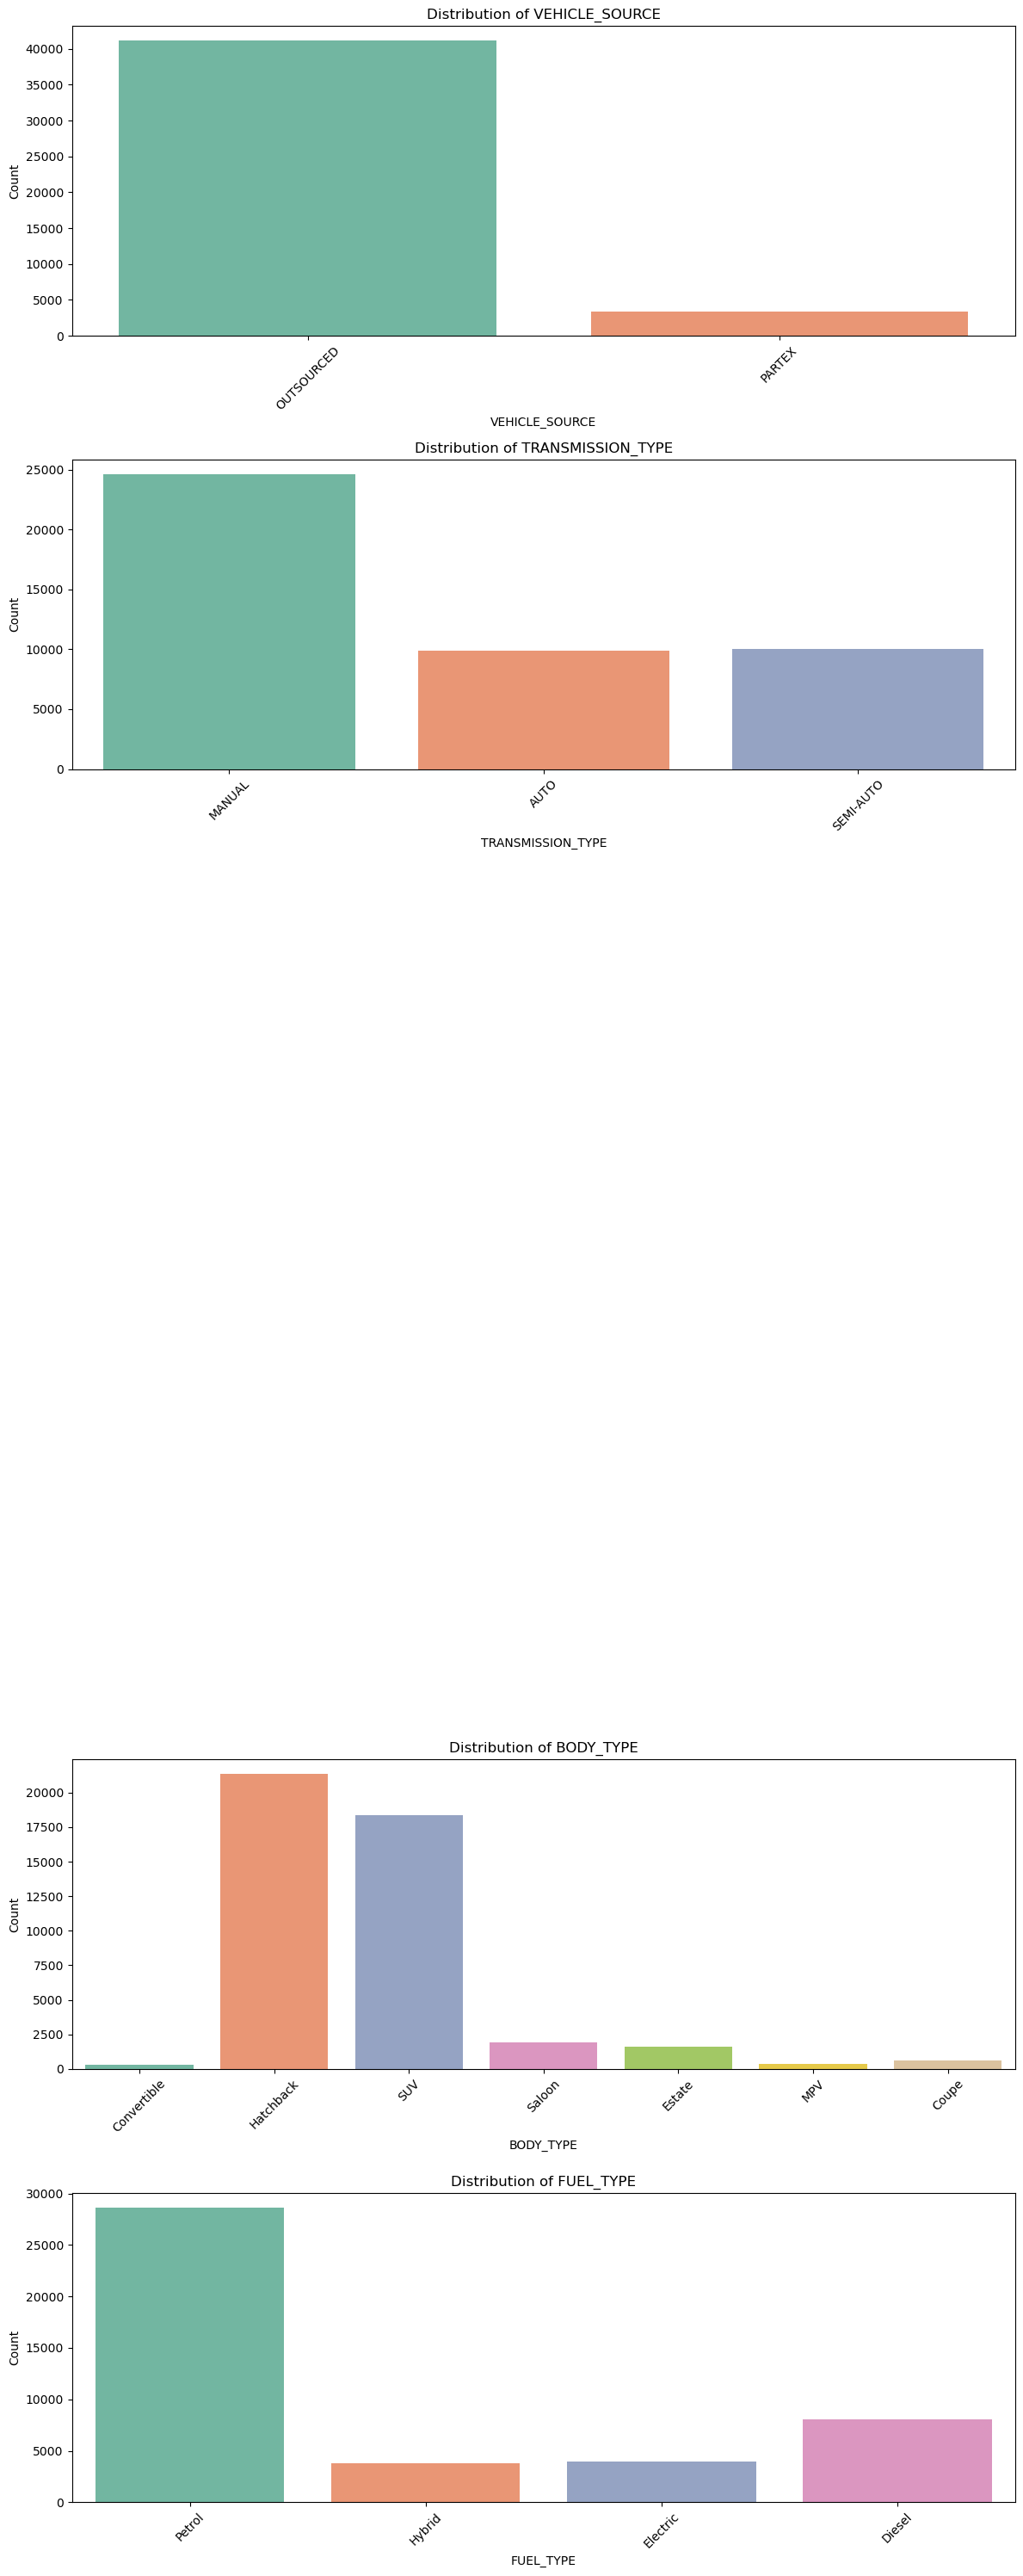

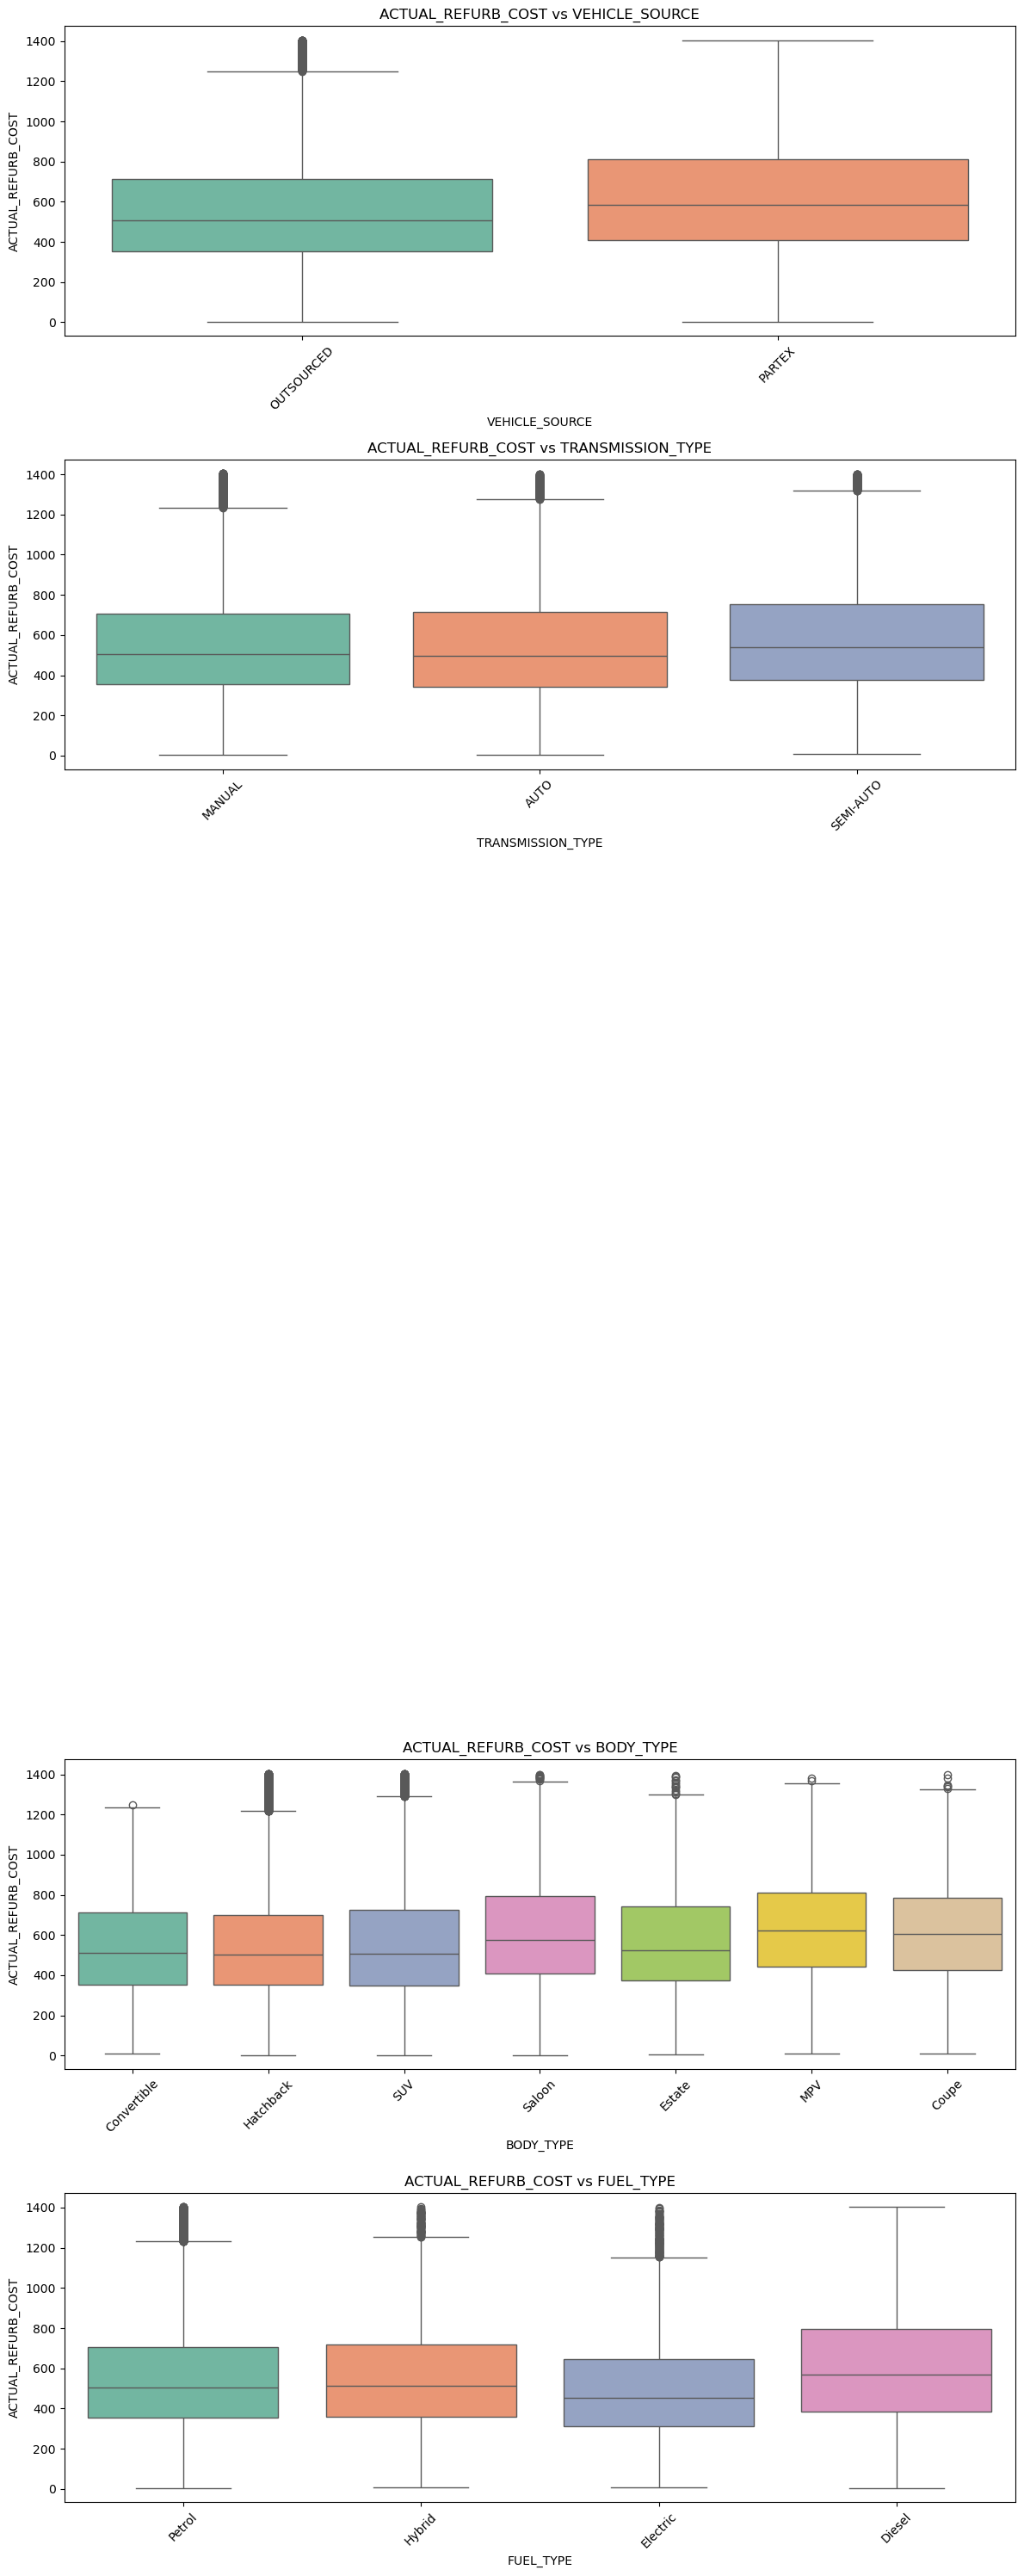

In [29]:
categorical_data_summary(df_cleaned)

## Target Variable Analysis

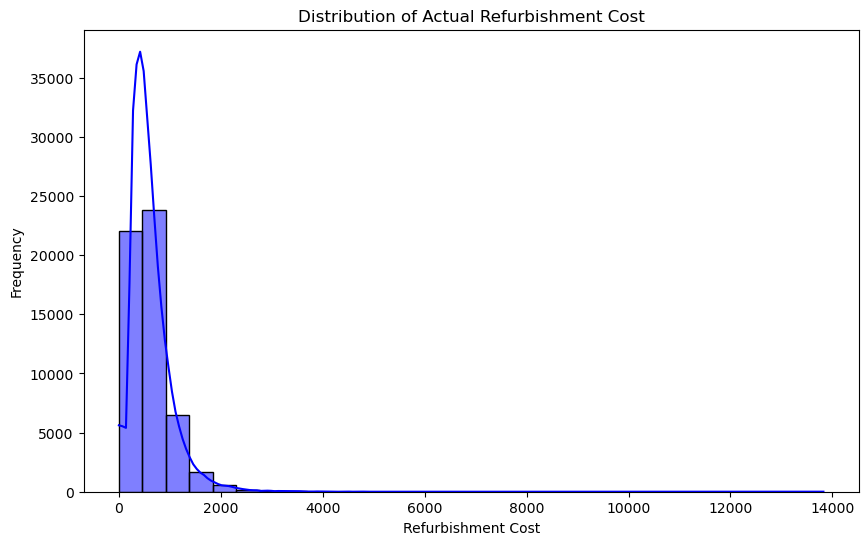

In [30]:
# Histogram of ACTUAL_REFURB_COST
plt.figure(figsize=(10, 6))
sns.histplot(df['ACTUAL_REFURB_COST'], bins=30, kde=True, color='blue')
plt.title('Distribution of Actual Refurbishment Cost')
plt.xlabel('Refurbishment Cost')
plt.ylabel('Frequency')
plt.show()

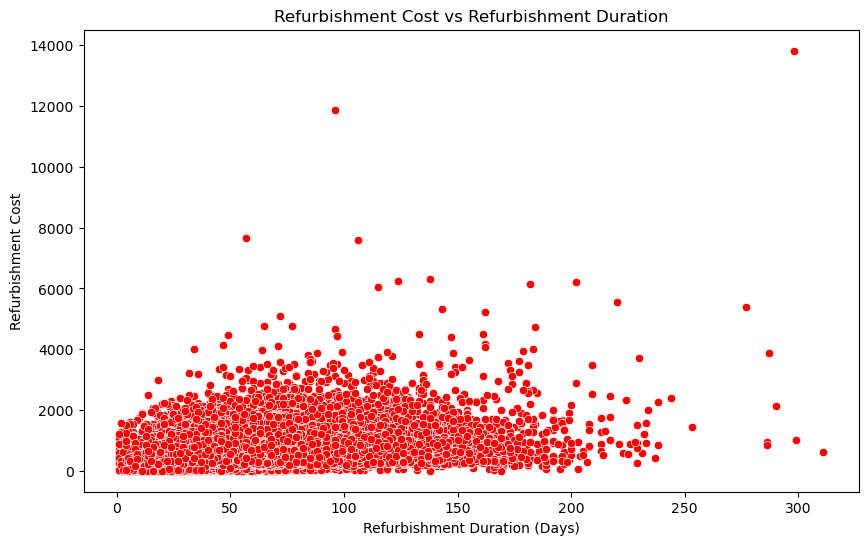

In [31]:
# Scatterplot of Refurbishment Cost vs Refurbishment Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ALL_REFURB_DAYS_DIFF'], y=df['ACTUAL_REFURB_COST'], color='red')
plt.title('Refurbishment Cost vs Refurbishment Duration')
plt.xlabel('Refurbishment Duration (Days)')
plt.ylabel('Refurbishment Cost')
plt.show()

# CAP_ID

In [33]:
# Number of unique CAP_IDs
unique_cap_ids = df['CAP_ID'].nunique()
print(f"Number of unique CAP_IDs: {unique_cap_ids}")

# Check CAP_ID frequency
cap_id_counts = df['CAP_ID'].value_counts()
print(cap_id_counts.head(10))  # Display top 10 CAP_IDs

Number of unique CAP_IDs: 9307
71788.0    372
89233.0    275
96773.0    229
90648.0    207
89347.0    162
96745.0    151
90663.0    149
92320.0    147
78488.0    146
91216.0    140
Name: CAP_ID, dtype: int64


In [34]:
# Group by CAP_ID and calculate the mean refurbishment cost
cap_id_avg_refurb = df.groupby('CAP_ID')['ACTUAL_REFURB_COST'].mean().sort_values(ascending=False)
print(cap_id_avg_refurb)

CAP_ID
73620.0    13823.665000
86719.0     4486.910000
94962.0     3588.390000
74952.0     3437.530000
94340.0     3252.834333
               ...     
84413.0        9.500000
69175.0        9.500000
84160.0        9.500000
72634.0        9.500000
88601.0        8.900000
Name: ACTUAL_REFURB_COST, Length: 9307, dtype: float64


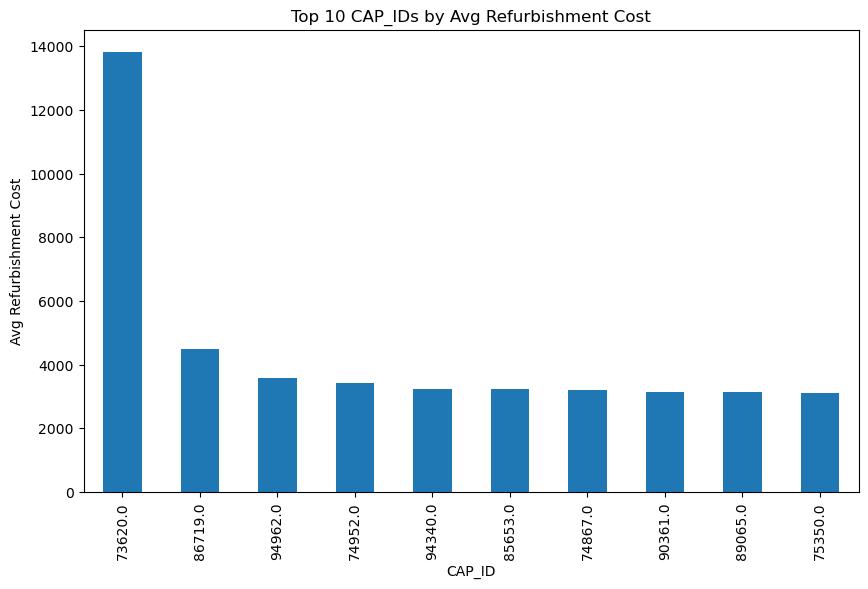

In [35]:
# Visualize top 10 CAP_IDs with the highest average refurbishment cost
cap_id_avg_refurb.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 CAP_IDs by Avg Refurbishment Cost")
plt.ylabel("Avg Refurbishment Cost")
plt.xlabel("CAP_ID")
plt.show()

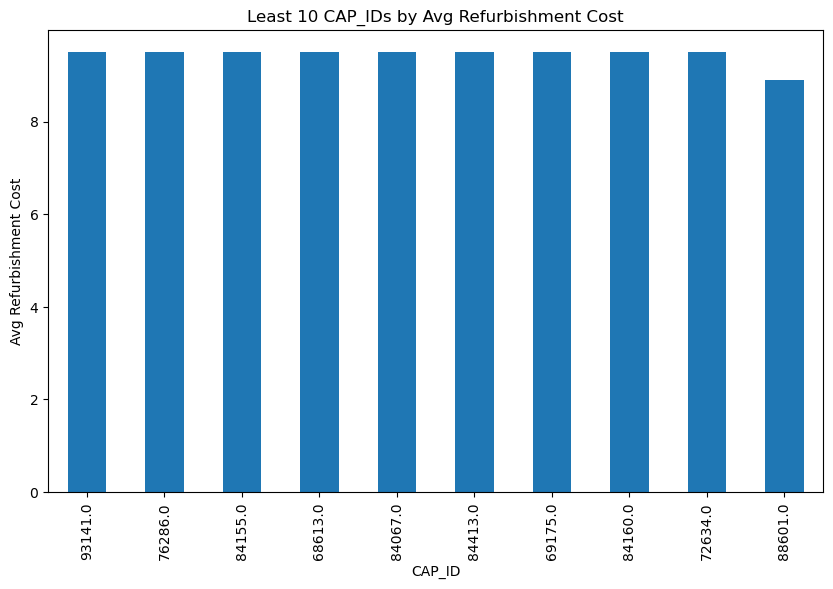

In [36]:
# Visualize least 10 CAP_IDs with the highest average refurbishment cost
cap_id_avg_refurb.tail(10).plot(kind='bar', figsize=(10, 6), title="Least 10 CAP_IDs by Avg Refurbishment Cost")
plt.ylabel("Avg Refurbishment Cost")
plt.xlabel("CAP_ID")
plt.show()

**Findings :**  CAP_ID 73620.0 with a significantly higher refurbishment cost compared to others, it suggests that this category might represent a unique or special type of vehicle, or maybe it is outlier

In [37]:
df[df['CAP_ID']==73620.0]

,VRM,VEHICLE_ID,CREATED_DATE,VIN_VEHICLE_ID_RANK_DESC,CAP_ID,MMAF,MAKE,ACTUAL_REFURB_COST,MAX_COMPLETE_DATE,ALL_REFURB_DAYS_DIFF,CAPID_DAYS_DIFF,MMAF_DAYS_DIFF,VEHICLE_TRIM,AVG_CAPID_REFURB_COST,AVG_MMAF_REFURB_COST,CAP_CLEAN,VEHICLE_AGE__MONTHS,VEHICLE_SOURCE,TRANSMISSION_TYPE,REGISTERED_KEEPERS,ODOMETER_MILES,MODEL,COLOUR,BODY_TYPE,FUEL_TYPE,REGISTRATION_DATE
30816,KW17WCX,a8e8c5de-1f36-490e-9f21-91583a9bf81e,2024-02-03 10:23:42.423,1,73620.0,AUDIRS 77 Years OldPETROL,AUDI,13823.665,2024-11-27,298,298.0,298.0,PERFORMANCE,13823.665,13823.665,32400.0,81.3,PARTEX,SEMI-AUTO,1.0,55636.0,RS 7,GREY,Hatchback,Petrol,2017-05-31


In [38]:
# Refurbishment cost for the Audi with CAP_ID 73620.0
audi_refurb_cost = df[df['CAP_ID'] == 73620.0]['ACTUAL_REFURB_COST'].iloc[0]

# Average refurbishment cost for other Audis
audi_avg_refurb_cost = df[(df['MAKE'] == 'AUDI')]['ACTUAL_REFURB_COST'].mean()

# Print the results
print(f"Refurbishment cost for this Audi: {audi_cost}")
print(f"Average refurbishment cost for other Audis: {audi_avg_cost}")
print(f"Difference: {audi_refurb_cost - audi_avg_refurb_cost}")


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5 audi_avg_refurb_cost = df[(df['MAKE'] == 'AUDI')]['ACTUAL_REFURB_COST'].mean()              │
│    6                                                                                             │
│    7 # Print the results                                                                         │
│ ❱  8 print(f"Refurbishment cost for this Audi: {audi_cost}")                                     │
│    9 print(f"Average refurbishment cost for other Audis: {audi_avg_cost}")                       │
│   10 print(f"Difference: {audi_refurb_cost - audi_avg_refurb_cost}")                             │
│   11                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'audi_cost' is not defined

In [ ]:
# Check correlation between CAP_ID and numerical features
numerical_features = ['ACTUAL_REFURB_COST', 'CAP_CLEAN', 'VEHICLE_AGE_MONTHS', 'ODOMETER_MILES']
df_corr = df[['CAP_ID'] + numerical_features].corr()
print(df_corr['CAP_ID'])

In [ ]:
# Visualize refurbishment costs for the top 10 CAP_IDs by frequency
top_cap_ids = df['CAP_ID'].value_counts().head(10).index
sns.boxplot(data=df[df['CAP_ID'].isin(top_cap_ids)], x='CAP_ID', y='ACTUAL_REFURB_COST')
plt.xticks(rotation=45)
plt.title("Refurbishment Costs by Top CAP_IDs")
plt.show()

In [ ]:
# NEW FEATURES 

df['CAP_ID_FREQUENCY'] = df['CAP_ID'].map(df['CAP_ID'].value_counts())

cap_id_mean_cost = df.groupby('CAP_ID')['ACTUAL_REFURB_COST'].mean()
df['CAP_ID_MEAN_COST'] = df['CAP_ID'].map(cap_id_mean_cost)

df['CAP_ID_COST_DEVIATION'] = df['ACTUAL_REFURB_COST'] - df['CAP_ID_MEAN_COST']

df['CAP_ID_COST_CATEGORY'] = pd.cut(df['CAP_ID_MEAN_COST'], bins=[0, 500, 2000, 10000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
df.head()

In [ ]:
# Correlation heatmap for CAP_ID-related features
cap_id_related_features = ['CAP_ID_FREQUENCY', 'CAP_ID_MEAN_COST', 'CAP_ID_COST_DEVIATION', 
                           'ACTUAL_REFURB_COST', 'CAP_CLEAN', 'VEHICLE_AGE_MONTHS', 'ODOMETER_MILES']
plt.figure(figsize=(10, 8))
sns.heatmap(df[cap_id_related_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for CAP_ID-related Features', fontsize=16)
plt.show()

In [ ]:
# Scatterplot: Actual vs Mean Refurbishment Costs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CAP_ID_MEAN_COST', y='ACTUAL_REFURB_COST', hue='CAP_ID_COST_CATEGORY', palette='Set2')
plt.title('Actual vs Mean Refurbishment Costs', fontsize=16)
plt.xlabel('CAP_ID Mean Refurbishment Cost', fontsize=12)
plt.ylabel('Actual Refurbishment Cost', fontsize=12)
plt.legend(title='Cost Category')
plt.show()

**1. What is the relationship between vehicle age and refurbishment cost?**

In [ ]:
# Scatterplot: Relationship between Vehicle Age and Refurbishment Cost
sns.scatterplot(x=df['VEHICLE_AGE__MONTHS'], y=df['ACTUAL_REFURB_COST'])
plt.title('Vehicle Age vs Refurbishment Cost')
plt.xlabel('Vehicle Age (Months)')
plt.ylabel('Refurbishment Cost')
plt.show()

**What are the refurbishment costs for new vs old vehicles by brand?**

In [ ]:
# Create a new column for categorizing vehicles as 'old' or 'new'
df['AGE_CATEGORY'] = df['VEHICLE_AGE__MONTHS'].apply(lambda x: 'Old' if x > 60 else 'New')

In [ ]:
# Group by Brand and Age Category and calculate the average refurbishment cost
avg_refurb_cost_by_brand_age = df.groupby(['MAKE', 'AGE_CATEGORY'])['ACTUAL_REFURB_COST'].mean().unstack()

# Display the result
print(avg_refurb_cost_by_model_age)


In [ ]:
# Bar plot: Average refurbishment cost for New vs Old vehicles by Model
avg_refurb_cost_by_model_age.plot(kind='bar', figsize=(14, 7))
plt.title('Average Refurbishment Cost for New vs Old Vehicles by Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Refurbishment Cost')
plt.xticks(rotation=90)
plt.legend(title='Age Category', labels=['New', 'Old'])
plt.show()


**Findings :**

    * While older vehicles typically incur higher refurbishment costs, there are some notable exceptions (e.g., Alfa Romeo, Tesla) where newer models have higher costs.
    
    * The presence of missing data for certain brands suggests that further investigation or more complete data may be needed to get a full picture.
    
    * Luxury brands (e.g., Mercedes-Benz, Land Rover) tend to have higher repair costs for older models, which is consistent with industry expectations.